In [6]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os
from datetime import datetime
import darts as dt
import seaborn as sns

In [7]:
ticker = yf.Ticker(ticker='AAPL').history('1y')

In [8]:
filepath = "/Users/mudit.000/OneDrive - University of Essex/Documents/GitHub/Personal-Research-Learning/Personal-Research-Learning/NSE-Stock-Historical-Data/v1"

In [9]:
dp = pl.read_csv(filepath + "/3IINFOLTD.NS.csv")

In [10]:
stocklist = []
stocknames = []

In [11]:
for files in os.listdir(filepath):
    stocknames.append(files)
    stocklist.append(pl.read_csv(filepath + "/" + files))

In [12]:
stocknames = pl.Series(stocknames)

In [13]:
stocknames = stocknames.str.replace(".NS.csv", "")

In [14]:
stocknames

""
str
"""20MICRONS"""
"""21STCENMGM"""
"""360ONE"""
"""3IINFOLTD"""
"""3MINDIA"""
…
"""ZOTA"""
"""ZUARI"""
"""ZUARIIND"""


In [15]:
df = dp.to_pandas()

In [16]:
dp = dp.with_columns(pl.col("Date").str.strptime(dtype=pl.Datetime).alias("Date"))

In [17]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [18]:
df['Date'] = df['Date'].str.slice(start=0, stop=11)

In [19]:
temp = []
for x in stocklist:
    temp.append(x.with_columns(pl.col('Date').str.slice(0,10).alias('Date')))

stocklist = temp

In [20]:
temp = pl.DataFrame()
i = 0
for x in stocklist:
    try:
        temp = temp.vstack(x)
        i += 1
    except:
        print(i)
        break

25


In [21]:
stocklist[25].describe()

statistic,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""4182""",4182.0,4182.0,4182.0,4182.0,4182.0,4182.0,4182.0,4182.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,11.193173,11.478431,10.94841,11.173159,9461.763271,0.0,0.0,0.0
"""std""",null,13.452913,13.953136,12.961758,13.333025,117694.391438,0.0,0.0,0.0
"""min""","""2007-03-19""",4.1,4.1,4.1,4.1,0.0,0.0,0.0,0.0
"""25%""",null,4.5,4.5,4.5,4.5,0.0,0.0,0.0,0.0
"""50%""",null,4.5,4.5,4.5,4.5,0.0,0.0,0.0,0.0
"""75%""",null,13.85,14.3,13.5,13.85,2239.0,0.0,0.0,0.0
"""max""","""2023-10-31""",96.0,100.650002,87.050003,91.5,6.5991e6,0.0,0.0,0.0


In [22]:
histData = pl.from_pandas(df)

In [23]:
histData

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
str,f64,f64,f64,f64,i64,f64,f64
"""2005-04-22 """,520.664895,520.664895,423.591779,432.857849,3304177,0.0,0.0
"""2005-04-25 """,436.387792,439.917724,415.649444,419.002869,1021511,0.0,0.0
"""2005-04-26 """,422.091553,424.739001,410.795783,412.119507,680155,0.0,0.0
"""2005-04-27 """,412.119501,449.007275,407.53058,424.03302,1872361,0.0,0.0
"""2005-04-28 """,423.591803,435.505322,417.679156,421.65033,741207,0.0,0.0
…,…,…,…,…,…,…,…
"""2023-10-26 """,36.0,36.599998,34.650002,35.700001,770037,0.0,0.0
"""2023-10-27 """,36.099998,36.950001,35.900002,36.599998,573842,0.0,0.0
"""2023-10-30 """,36.799999,37.349998,36.25,36.900002,400942,0.0,0.0


In [24]:
histData = histData.with_columns(pl.col("Date").str.strip_chars())

In [25]:
histData = histData.with_columns(pl.col("Date").str.to_date(format="%F"))

In [26]:
histData

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,f64,f64,f64,f64,i64,f64,f64
2005-04-22,520.664895,520.664895,423.591779,432.857849,3304177,0.0,0.0
2005-04-25,436.387792,439.917724,415.649444,419.002869,1021511,0.0,0.0
2005-04-26,422.091553,424.739001,410.795783,412.119507,680155,0.0,0.0
2005-04-27,412.119501,449.007275,407.53058,424.03302,1872361,0.0,0.0
2005-04-28,423.591803,435.505322,417.679156,421.65033,741207,0.0,0.0
…,…,…,…,…,…,…,…
2023-10-26,36.0,36.599998,34.650002,35.700001,770037,0.0,0.0
2023-10-27,36.099998,36.950001,35.900002,36.599998,573842,0.0,0.0
2023-10-30,36.799999,37.349998,36.25,36.900002,400942,0.0,0.0


<Axes: xlabel='Open', ylabel='Count'>

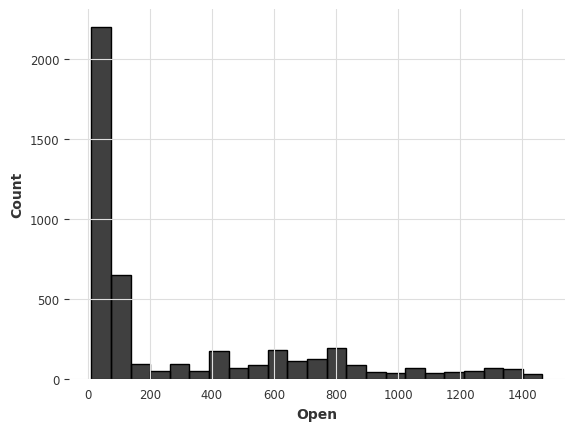

In [27]:
sns.histplot(data=histData, x="Open")